<a href="https://colab.research.google.com/github/Hamid-Mofidi/PNP/blob/main/Bifurcation_of_lambda/bif_of_lam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is for the bifurcation analysis of flux ratio for studying the
effects of permanent charges on ionic flows

In [1]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def equations(x):
    A, I, V, l = x

    k = 1
    r = 2

    sqA    = np.sqrt(1+A**2)
    sqB    = np.sqrt(1+(l-A+r)**2) #assume that alpha=1/3, beta=2/3
    logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
    rho    = (A-l)**2 + (sqA - sqB)*(A-l)
    sigma  = l/r
    logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
    siglog = 3*sigma*np.log( np.nan_to_num(sigma, nan = +1e-15) )/(l*(sigma-1))

    numI1   = (( (-1)**(k+1) )*siglog) * (A-l)**2
    numI2   = (logAB - ((-1)**k) * np.log( np.nan_to_num(sigma, nan = +1e-15) ))*(A-l)
    gamma1  = 1/(I-(A-l) * sqA)
    gamma2  = 1/(I-(A-l) * sqB)
    M       = I * (gamma2 - gamma1)+ rho/I
    ABGamma = A * gamma1 + (l-A+r) * gamma2
    ABGammaR= (1/A) * gamma1 + (1/(l-A+r)) * gamma2
    G41     = ( 1- (A-l)*ABGamma )*( logSBA + (A-l) * siglog )
    G42     = ( 1- (A-l)*ABGamma )* M
    G43     = ( I+ ( ((-1)**k) * (A-l) ) ) * siglog * M
    GR      =( ( I**2-(A-l)**2 )/(A-l) ) * M * ABGammaR



    f1 = rho - (I* ( np.nan_to_num(np.log(np.nan_to_num( I-(A-l)*sqB, nan = +1e-10) ), nan = +1e-10)- np.nan_to_num(np.log(np.nan_to_num( I-(A-l)*sqA , nan = +1e-10) ) , nan = +1e-10) ) )
    f2 = V - logAB + ((I*logSBA-rho)/(A-l))
    f3 = I - (numI1 + numI2+rho)/(logSBA + (siglog)*(A-l))
    f4 = G41 - G42 + G43 - GR

    return [f1, f2, f3, f4]



<ipython-input-2-5cc46d40b33f>:9: RuntimeWarning: divide by zero encountered in log
  logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
<ipython-input-2-5cc46d40b33f>:9: RuntimeWarning: invalid value encountered in double_scalars
  logAB  = np.log(np.nan_to_num((l-A+r)*(sqA-1), nan = +1e-15) )- np.log(np.nan_to_num (A*(sqB-1), nan = +1e-15) )
<ipython-input-2-5cc46d40b33f>:12: RuntimeWarning: divide by zero encountered in log
  logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
<ipython-input-2-5cc46d40b33f>:12: RuntimeWarning: invalid value encountered in double_scalars
  logSBA = np.log(np.nan_to_num( sigma*(l-A+r) , nan = +1e-15) ) - np.log( np.nan_to_num(A, nan = +1e-15) ) # not a real number
<ipython-input-2-5cc46d40b33f>:13: RuntimeWarning: divide by zero encountered in log
  siglog = 3*sigma*np.log( np.nan_to_num(sigma, nan = +1e-15) )/(l*(sig

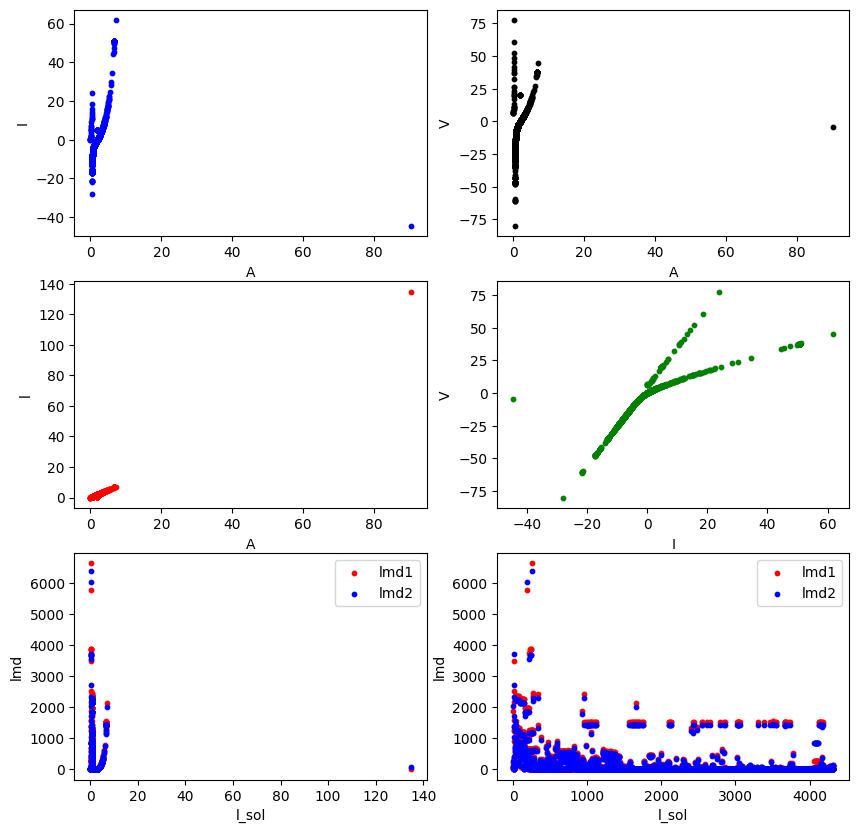

In [3]:
# set a range of initial values
A_range = np.linspace(0, 2, 10)
I_range = np.linspace(-50, 50, 10)
V_range = np.linspace(-50, 50, 10)
l_range = np.linspace(0, 2, 10)

# Create a boolean mask for the constraint
# The resulting arrays for A_range, I_range, V_range, and L_range
# will only contain values that satisfy the constraint.
expression1 = (A_range - l_range) * np.sqrt(1 + A_range**2)
expression2 = (A_range - l_range) * np.sqrt(1 + (l_range - A_range )**2)

max_expression = np.maximum(expression1, expression2)
min_expression = np.minimum(expression1, expression2)

mask = np.logical_or(I_range > max_expression, I_range < min_expression)

# Apply the mask to all arrays
A_range = A_range[mask]
I_range = I_range[mask]
V_range = V_range[mask]
l_range = l_range[mask]

# initialize arrays to store solutions
A_sol = np.array([])
I_sol = np.array([])
V_sol = np.array([])
l_sol = np.array([])

# loop through all combinations of initial values
for a in A_range:
    for i in I_range:
        for v in V_range:
            for ll in l_range:
                x0 = [a, i, v, ll]
                sol = root(equations, x0, method='hybr')
                if sol.success: # check if solution was found
                    A_sol = np.append(A_sol, sol.x[0])
                    I_sol = np.append(I_sol, sol.x[1])
                    V_sol = np.append(V_sol, sol.x[2])
                    l_sol = np.append(l_sol, sol.x[3])


In [4]:
print(I_sol)
np.shape(I_sol)

[ 1.91523893e+00  1.54872481e+00  9.68188402e-01 ...  1.18890273e+01
 -7.78639569e-04  1.37188819e-01]


(4323,)

In [ ]:
r = 2


# Calculate lmd1 and lmd2
lmd1 = 3*(l_sol - A_sol + I_sol) * \
       (np.log(np.nan_to_num(l_sol/r, nan=+1e-15))) / \
       (l_sol - r) * (V_sol + np.log(np.nan_to_num(l_sol/r, nan=+1e-15)))

lmd2 = 3*(l_sol - A_sol - I_sol) * \
       (np.log(np.nan_to_num(l_sol/r, nan=+1e-15))) / \
       (l_sol - r) * (-V_sol + np.log(np.nan_to_num(l_sol/r, nan=+1e-15)))

# Generate t vector
t = np.arange(len(lmd1))

# plot the solutions
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].scatter(A_sol, I_sol, s=10, c='blue')
axs[0, 0].set_xlabel('A')
axs[0, 0].set_ylabel('I')
#axs[0,0].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[0,0].set_ylim(ymin, ymax)  # Adjust the y-axis limits
axs[0, 1].scatter(A_sol, V_sol, s=10, c='black')
axs[0, 1].set_xlabel('A')
axs[0, 1].set_ylabel('V')
#axs[0,1].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[0,1].set_ylim(ymin, ymax)  # Adjust the y-axis limits
axs[1, 0].scatter(A_sol, l_sol, s=10, c='red')
axs[1, 0].set_xlabel('A')
axs[1, 0].set_ylabel('l')
#axs[1,0].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[1,0].set_ylim(ymin, ymax)  # Adjust the y-axis limits
axs[1, 1].scatter(I_sol, V_sol, s=10, c='green')
axs[1, 1].set_xlabel('I')
axs[1, 1].set_ylabel('V')
#axs[1, 1].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[1, 1].set_ylim(ymin, ymax)  # Adjust the y-axis limits
# Plot lmd1 and lmd2 using scatter plots
axs[2, 0].scatter(l_sol, lmd1, label='lmd1',s=10, color='red')
axs[2, 0].scatter(l_sol, lmd2, label='lmd2', s=10, color='blue')
axs[2, 0].set_xlabel('l_sol')
axs[2, 0].set_ylabel('lmd')
axs[2, 0].legend()
#axs[2, 0].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[2, 0].set_ylim(ymin, ymax)  # Adjust the y-axis limits
axs[2, 1].scatter(t, lmd1, label='lmd1', s=10, color='red')
axs[2, 1].scatter(t, lmd2, label='lmd2', s=10, color='blue')
axs[2, 1].set_xlabel('l_sol')
axs[2, 1].set_ylabel('lmd')
axs[2, 1].legend()
#axs[2, 1].set_xlim(xmin, xmax)  # Adjust the x-axis limits
#axs[2, 1].set_ylim(ymin, ymax)  # Adjust the y-axis limits
plt.show()

# x0 = [0.5, 0.5, 5, 5]
# sol = root(equations, x0, method='hybr')
# sol = root(equations, x0, method='broyden1')
# sol = root(equations, x0, method='anderson')

# print(sol.x)